# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# set current directory
# this should be the Google Drive folder where your file(s) are located
%cd /content/drive/MyDrive/lattices

## verify current directory
!ls /content/drive/MyDrive/lattices

# choose where you want your project files to be saved
project_folder = "/content/drive/MyDrive/lattices"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1cPQ2fA-SRAPng-aTI1P8QDLacE-wxHcy/lattices
data  data2  _debug  LatentLattice  results


In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

! pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
! pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
! pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 45.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
! pip install lattpy
! pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.8/460.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
! git clone https://github.com/julballa/LatentLattice.git

Cloning into 'LatentLattice'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 10), reused 15 (delta 4), pack-reused 0
Receiving objects: 100% (29/29), 703.88 KiB | 6.07 MiB/s, done.
Resolving deltas: 100% (10/10), done.


# Load and save dataset

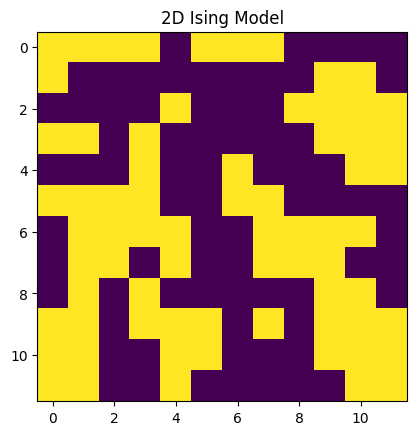

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import simulate_ising, plot_grid

# Parameters
grid_size = 12
temperature = 5.0
steps = 500

# Simulation
final_grid = simulate_ising(grid_size, temperature, steps)

# Plotting results
plot_grid(final_grid)



# Train model

In [ ]:
! python LatentLattice/train.py --mp_steps 3 --batch_size 32 --debug --layers 2 --edgeloss_weight 0.0

Namespace(debug=True, mp_steps=3, emb_dim=32, layers=2, pooling=True, up_mlp=False, residual=True, noise=False, transpose=False, attn=False, loss='all', mode='train', lr_init=0.001, epochs=40, batch_size=32, edgeloss_weight=0.0, kl_weight=0, dataname='2d_square_lattice', num_workers=0, data_path='data/', working_dir='', suffix='', log_dir='', checkpoint_dir='trained_models', saved_model_dir=None)
Training with 1 GPUs!

# Params: 205090
=====Epoch 1
Training...
Iteration:   0% 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
loss_dist 2.008, loss_coords 1.219, loss_res 0.570, : 100% 32/32 [01:36<00:00,  3.01s/it]
Evaluating...
Iteration: 100% 7/7 [00:10<00:00,  1.43s/it]
Epoch 1, valid_edge_mae: 1.99829, Train_mae: 1.21811, Validation_mae: 1.21688

In [ ]:
! python LatentLattice/train.py --mp_steps 3 --batch_size 32 --debug --layers 2 --edgeloss_weight 0.0 --epochs 50

Namespace(debug=True, mp_steps=3, emb_dim=32, layers=2, pooling=True, up_mlp=False, residual=True, noise=False, transpose=False, attn=False, loss='all', mode='train', lr_init=0.001, epochs=50, batch_size=32, edgeloss_weight=0.0, kl_weight=0, dataname='2d_square_lattice', num_workers=0, data_path='data/', working_dir='', suffix='', log_dir='', checkpoint_dir='trained_models', saved_model_dir=None)
Training with 1 GPUs!

# Params: 205090
=====Epoch 1
Training...
Iteration:   0% 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
loss_dist 1.281, loss_coords 0.863, loss_res 0.580, : 100% 32/32 [01:32<00:00,  2.89s/it]
Evaluating...
Iteration: 100% 7/7 [00:09<00:00,  1.40s/it]
Epoch 1, valid_edge_mae: 1.27398, Train_mae: 1.10613, Validation_mae: 0.84545

In [ ]:
! python LatentLattice/train.py --mp_steps 3 --batch_size 32 --debug --layers 2 --edgeloss_weight 0.0 --epochs 50

Namespace(debug=True, mp_steps=3, emb_dim=32, layers=2, pooling=True, up_mlp=False, residual=True, noise=False, transpose=False, attn=False, loss='all', mode='train', lr_init=0.001, epochs=50, batch_size=32, edgeloss_weight=0.0, kl_weight=0, dataname='2d_square_lattice', num_workers=0, data_path='data/', working_dir='', suffix='', log_dir='', checkpoint_dir='trained_models', saved_model_dir=None)
Training with 1 GPUs!

# Params: 205090
=====Epoch 1
Training...
Iteration:   0% 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
loss_dist 1.281, loss_coords 0.863, loss_res 0.580, : 100% 32/32 [00:27<00:00,  1.17it/s]
Evaluating...
Iteration: 100% 7/7 [00:04<00:00,  1.47it/s]
Epoch 1, valid_edge_mae: 1.27398, Train_mae: 1.10613, Validation_mae: 0.84545

In [ ]:
! python LatentLattice/train.py --mp_steps 3 --batch_size 32 --layers 2 --edgeloss_weight 0.0 --epochs 100

Namespace(debug=False, mp_steps=3, emb_dim=32, layers=2, pooling=True, up_mlp=False, residual=True, noise=False, transpose=False, attn=False, loss='all', mode='train', lr_init=0.001, epochs=100, batch_size=32, edgeloss_weight=0.0, kl_weight=0, dataname='2d_square_lattice', num_workers=0, data_path='data/', working_dir='', suffix='', log_dir='', checkpoint_dir='trained_models', saved_model_dir=None)
Training with 1 GPUs!

# Params: 205090
=====Epoch 1
Training...
Iteration:   0% 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
loss_dist 1.281, loss_coords 0.863, loss_res 0.580, : 100% 32/32 [00:25<00:00,  1.26it/s]
Evaluating...
Iteration: 100% 7/7 [00:04<00:00,  1.53it/s]
Epoch 1, valid_edge_mae: 1.27398, Train_mae: 1.10613, Validation_mae: 0.845

Rectangle:

In [ ]:
! python LatentLattice/train.py --mp_steps 3 --batch_size 32 --debug --layers 2 --edgeloss_weight 0.0 --epochs 100

Namespace(debug=True, mp_steps=3, emb_dim=32, layers=2, pooling=True, up_mlp=False, residual=True, noise=False, transpose=False, attn=False, loss='all', mode='train', lr_init=0.001, epochs=100, batch_size=32, edgeloss_weight=0.0, kl_weight=0, dataname='2d_square_lattice', num_workers=0, data_path='data/', working_dir='', suffix='', log_dir='', checkpoint_dir='trained_models', saved_model_dir=None)
Training with 1 GPUs!

# Params: 205090
=====Epoch 1
Training...
Iteration:   0% 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
loss_dist 1.105, loss_coords 0.937, loss_res 0.696, : 100% 32/32 [00:25<00:00,  1.24it/s]
Evaluating...
Iteration: 100% 7/7 [00:04<00:00,  1.52it/s]
Epoch 1, valid_edge_mae: 1.08917, Train_mae: 1.13869, Validation_mae: 0.9013

Distortion

In [ ]:
! python LatentLattice/train.py --mp_steps 3 --batch_size 32 --debug --layers 2 --edgeloss_weight 0.0 --epochs 100

Namespace(debug=True, mp_steps=3, emb_dim=32, layers=2, pooling=True, up_mlp=False, residual=True, noise=False, transpose=False, attn=False, loss='all', mode='train', lr_init=0.001, epochs=100, batch_size=32, edgeloss_weight=0.0, kl_weight=0, dataname='2d_square_lattice', num_workers=0, data_path='data/', working_dir='', suffix='', log_dir='', checkpoint_dir='trained_models', saved_model_dir=None)
Training with 1 GPUs!

# Params: 205090
=====Epoch 1
Training...
Iteration:   0% 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch_geometric/data/storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
loss_dist 1.665, loss_coords 1.151, loss_res 0.562, : 100% 32/32 [00:25<00:00,  1.25it/s]
Evaluating...
Iteration: 100% 7/7 [00:04<00:00,  1.50it/s]
Epoch 1, valid_edge_mae: 1.54999, Train_mae: 1.35521, Validation_mae: 1.1443